In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/Users/kodaikato/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


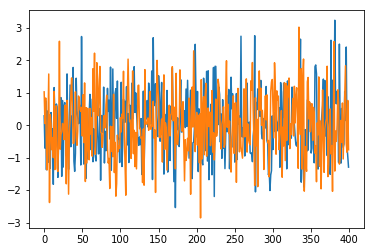

In [2]:
y_wn = stats.norm.rvs(loc=0, scale=1.0, size=400)
x_wn = stats.norm.rvs(loc=0, scale=1.0, size=400)
plt.plot(y_wn)
plt.plot(x_wn)
plt.show()

In [3]:
ols_wn = sm.OLS(y_wn, x_wn).fit()
ols_wn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.170
Date:                Wed, 23 May 2018   Prob (F-statistic):              0.142
Time:                        14:04:32   Log-Likelihood:                -560.74
No. Observations:                 400   AIC:                             1123.
Df Residuals:                     399   BIC:                             1127.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0738      0.050     -1.473      0.142      -0.172       0.025
==============================================================================
Omnibus:                        3.107   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                3.045
Skew:                           0.214   Prob(JB):                        0.218
Kurtosis:                       2.991   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-square: 決定係数
- Adj. R-square: 自由度調整済み決定係数
- coef: 係数， std err: 標準誤差，　t： t値， P>|t|: 帰無仮説を「係数が0」とした時のp値

In [4]:
ols_wn.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.003    
Dependent Variable: y                AIC:                1123.4785
Date:               2018-05-23 14:04 BIC:                1127.4699
No. Observations:   400              Log-Likelihood:     -560.74  
Df Model:           1                F-statistic:        2.170    
Df Residuals:       399              Prob (F-statistic): 0.142    
R-squared:          0.005            Scale:              0.96882  
---------------------------------------------------------------------
         Coef.     Std.Err.       t       P>|t|      [0.025    0.975]
---------------------------------------------------------------------
x1      -0.0738      0.0501    -1.4731    0.1415    -0.1722    0.0247
------------------------------------------------------------------
Omnibus:               3.107        Durbin-Watson:           2.208
Prob(Omnibus):         0.212        Jarque-Bera (JB):        3.045
Skew:                  0.214        Prob(JB):                0.218
Kurtosis:              2.991        Condition No.:           1    
==================================================================

"""

In [5]:
y_rw = np.cumsum(y_wn)
x_rw = np.cumsum(x_wn)

In [6]:
ols_rw = sm.OLS(y_rw, x_rw).fit()
ols_rw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6365
Date:                Wed, 23 May 2018   Prob (F-statistic):              0.425
Time:                        14:04:32   Log-Likelihood:                -1444.6
No. Observations:                 400   AIC:                             2891.
Df Residuals:                     399   BIC:                             2895.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0550      0.069     -0.798      0.425      -0.190       0.080
==============================================================================
Omnibus:                       29.618   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.324
Skew:                          -0.123   Prob(JB):                      0.00348
Kurtosis:                       2.213   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 全くなんの関係もない２つのランダムウォーク系列を回帰分析すると優位な回帰係数が得られる
- 決定係数も高い，説明変数の係数のp値も低い
- 何らかの関係性がある　→ 誤った結論

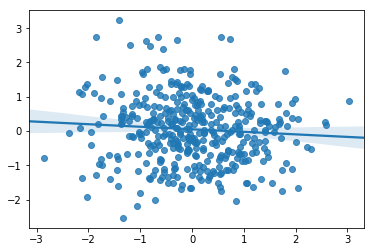

In [7]:
sns.regplot(x=x_wn, y=y_wn)

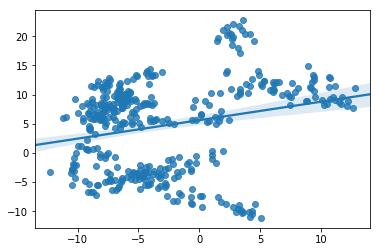

In [8]:
sns.regplot(x=x_rw, y=y_rw)

In [9]:
from statsmodels.tsa.arima_process import arma_generate_sample
y_ar = arma_generate_sample(ar=[1.,-0.8],ma=[1.],nsample=400)
x_ar = arma_generate_sample(ar=[1.,-0.8],ma=[1.],nsample=400)

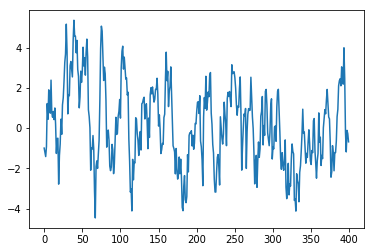

In [10]:
plt.plot(y_ar)
plt.show()

In [11]:
ols_ar = sm.OLS(y_ar, x_ar).fit()
ols_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.258
Date:                Wed, 23 May 2018   Prob (F-statistic):              0.263
Time:                        14:04:33   Log-Likelihood:                -836.50
No. Observations:                 400   AIC:                             1675.
Df Residuals:                     399   BIC:                             1679.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0622      0.055     -1.122      0.263      -0.171       0.047
==============================================================================
Omnibus:                        6.979   Durbin-Watson:                   0.299
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                4.979
Skew:                           0.141   Prob(JB):                       0.0830
Kurtosis:                       2.531   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 残差に自己相関がある場合，このような見せかけの回帰が発生する
- これを検定するのがDurbin-Watson

$DW=\frac{\sum_{t=2}^{T}(\hat u_t-\hat u_{t-1})^2}{\sum_{t=1}^{T}\hat u_t^2}$

- Tはサンプルサイズ
- $\hat u_t$は，$y_t=\beta_0 + \sum_{k=1}^{r}\beta_k x_{k,t} + u_t$の残差
- $r$は説明変数の数
- DWが２からどれ程離れているかを確認すれば残差の自己相関について見当がつく

In [12]:
resid_ols = ols_ar.resid
dw = ((resid_ols - np.roll(resid_ols, 1) )**2)[1:].sum() / (resid_ols ** 2).sum()
dw

0.2986509460462624

- 上の結果と一致してる

In [13]:
ols_ar.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.001    
Dependent Variable: y                AIC:                1675.0022
Date:               2018-05-23 14:04 BIC:                1678.9937
No. Observations:   400              Log-Likelihood:     -836.50  
Df Model:           1                F-statistic:        1.258    
Df Residuals:       399              Prob (F-statistic): 0.263    
R-squared:          0.003            Scale:              3.8464   
---------------------------------------------------------------------
         Coef.     Std.Err.       t       P>|t|      [0.025    0.975]
---------------------------------------------------------------------
x1      -0.0622      0.0554    -1.1215    0.2627    -0.1712    0.0468
------------------------------------------------------------------
Omnibus:               6.979        Durbin-Watson:           0.299
Prob(Omnibus):         0.031        Jarque-Bera (JB):        4.979
Skew:                  0.141        Prob(JB):                0.083
Kurtosis:              2.531        Condition No.:           1    
==================================================================

"""

---
memo

In [14]:
"""
import numpy as np
import pandas as pd
import numpy.random as rd
import itertools, sys

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.style.use('ggplot')

from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api as sm
import statsmodels.tsa.stattools as stt
import statsmodels.graphics.tsaplots as tsaplots



def select_negative(l):
    res = []
    l = np.array(l)
    n = len(l)
    res.append(l)
    l = np.array(l)
    for i in range(n):
        for j in itertools.combinations(range(n),i+1):
            _l = l.copy()
            _l[list(j)] = _l[list(j)] * -1
            res.append(_l)
    return res

cnt = 0
n = 3
nobs = 500
itrvl = 28

for len_ar in range(n):
    for len_ma in range(n):

        _ar_params = [.7, .3][:len_ar]
        _ma_params = [.7, .3][:len_ma]

        _ar_params = select_negative(_ar_params)
        _ma_params = select_negative(_ma_params)
        for i in _ar_params:
            for j in _ma_params:
                cnt += 1

                ar_params = np.r_[1, -i]
                ma_params = np.r_[1, j]

                print(f"ar_params: {ar_params}, ma_params: {ma_params}")
                yy = arma_generate_sample(ar_params, ma_params, nobs)
                ts = pd.Series(yy, index=pd.date_range('2010/1/1', periods=nobs))
                ar_sign = ['+' if val >= 0 else '-' for val in i]
                ma_sign = ['+' if val >= 0 else '-' for val in j]

                plt.subplots(2, 1, sharex=True, figsize=(15,7)) 
                gs = gridspec.GridSpec(2, 1, height_ratios=[5,2])
                ax1 = plt.subplot(gs[0])
                ax2 = plt.subplot(gs[1])

                # ax1 --------
                ts.plot(color="b", alpha=0.4, lw=1, ax=ax1,
                        title="ARMA({0},{1}). ar:{2},ma:{3}, ar:{4},ma:{5}".format(len_ar, len_ma, i, j, ar_sign, ma_sign))
                ax1.set_title(ax1.get_title(), fontsize=16)

                ts_mean = pd.rolling_mean(ts,itrvl)
                ts_std = pd.rolling_std(ts,itrvl) 
                upper = ts_mean + ts_std * 1.96
                lower = ts_mean - ts_std * 1.96

                ts_mean.plot(ax=ax1)
                upper.plot(figsize=(15,7), c="purple", alpha=.6, ax=ax1, linestyle='--')
                lower.plot(figsize=(15,7), c="purple", alpha=.6, ax=ax1, linestyle='--')

                # ax2 --------
                tsaplots.plot_acf(ts ,ax=ax2, color="g", lags=300, lw=2)
                plt.subplots_adjust(hspace=0)
"""

'\nimport numpy as np\nimport pandas as pd\nimport numpy.random as rd\nimport itertools, sys\n\n%matplotlib inline\nimport matplotlib.pyplot as plt\nfrom matplotlib import gridspec\nplt.style.use(\'ggplot\')\n\nfrom statsmodels.tsa.arima_process import arma_generate_sample\nimport statsmodels.api as sm\nimport statsmodels.tsa.stattools as stt\nimport statsmodels.graphics.tsaplots as tsaplots\n\n\n\ndef select_negative(l):\n    res = []\n    l = np.array(l)\n    n = len(l)\n    res.append(l)\n    l = np.array(l)\n    for i in range(n):\n        for j in itertools.combinations(range(n),i+1):\n            _l = l.copy()\n            _l[list(j)] = _l[list(j)] * -1\n            res.append(_l)\n    return res\n\ncnt = 0\nn = 3\nnobs = 500\nitrvl = 28\n\nfor len_ar in range(n):\n    for len_ma in range(n):\n\n        _ar_params = [.7, .3][:len_ar]\n        _ma_params = [.7, .3][:len_ma]\n\n        _ar_params = select_negative(_ar_params)\n        _ma_params = select_negative(_ma_params)\n     